# Mall Customer Segmentation Data KMeans Clustering

## Import the Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

## Load the Dataset

In [30]:
df= pd.read_csv('../data/raw/Mall_Customers.csv')

## Exploratory Data Analysis (EDA)

In [31]:
# check for missing values, duplicates, and the structure of the data
 
print(df.head())
print(df.info())
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

## Data Preprocessing

In [32]:
# Data cleaning (Removing Duplicates)
df.drop_duplicates(inplace=True)

# Encode Gender column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0

# Select the features for clustering
X = df[['Age','Gender','Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)



## Optimal Number of Clusters (Elbow Method)

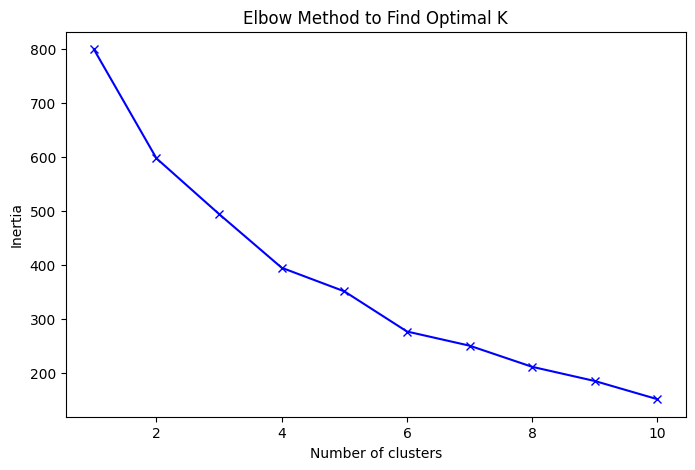

In [33]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal K')
plt.show()


## Fit the K-Means Model

In [34]:
# Based on the elbow method, we can choose an optimal number of clusters. Let’s assume the elbow point is at K=5

# Train K-Means model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)

# Add cluster labels to the original data
df['Cluster'] = kmeans.labels_


## Visualize the Clusters

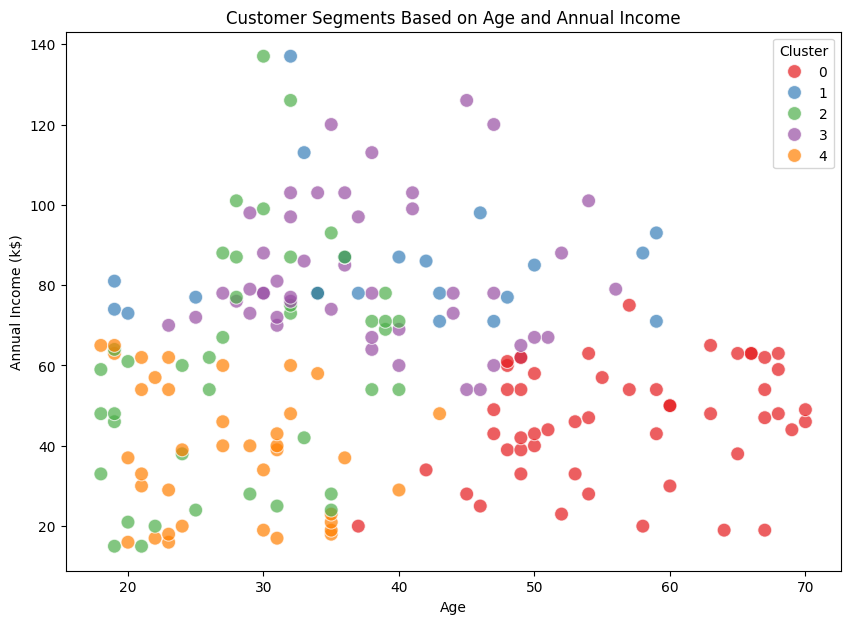

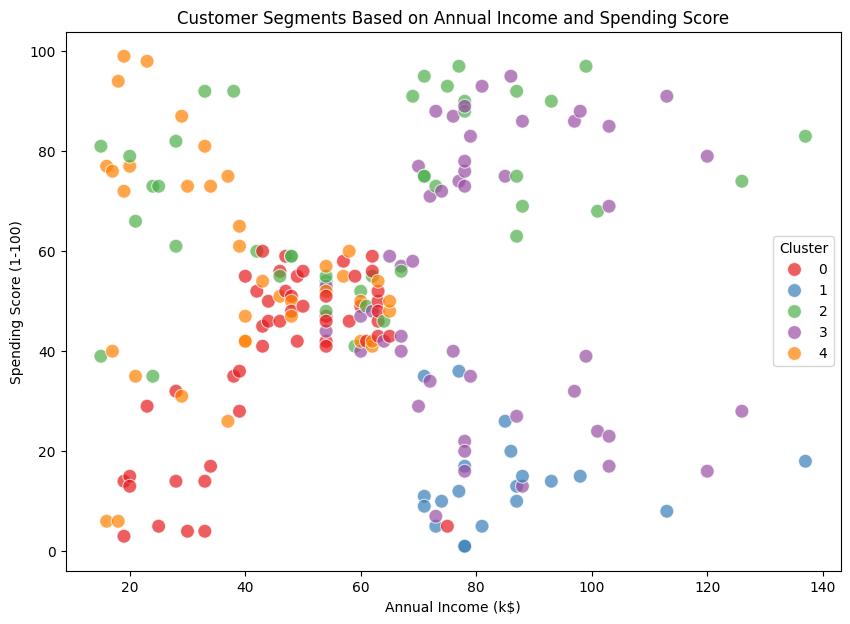

In [35]:
# Visualize clusters based on Age and Annual Income
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', 
                data=df, palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segments Based on Age and Annual Income')
plt.show()

# Visualize clusters based on Spending Score and Annual Income
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', 
                data=df, palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()


## Apply PCA for Dimensionality Reduction
#### Since we are working with multiple dimensions (e.g., Age, Gender, Annual Income, and Spending Score), it becomes difficult to visualize clusters in 2D. Applying PCA allows us to reduce the dimensionality of the dataset while retaining the most important information.

In [36]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Check explained variance ratio to understand how much variance is retained
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.33690046 0.26230645]


## K-Means Clustering with PCA

In [37]:
# Apply K-Means with optimal number of clusters (assumed K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

# Add PCA components to the dataframe for visualization
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]


## Visualize the Clusters

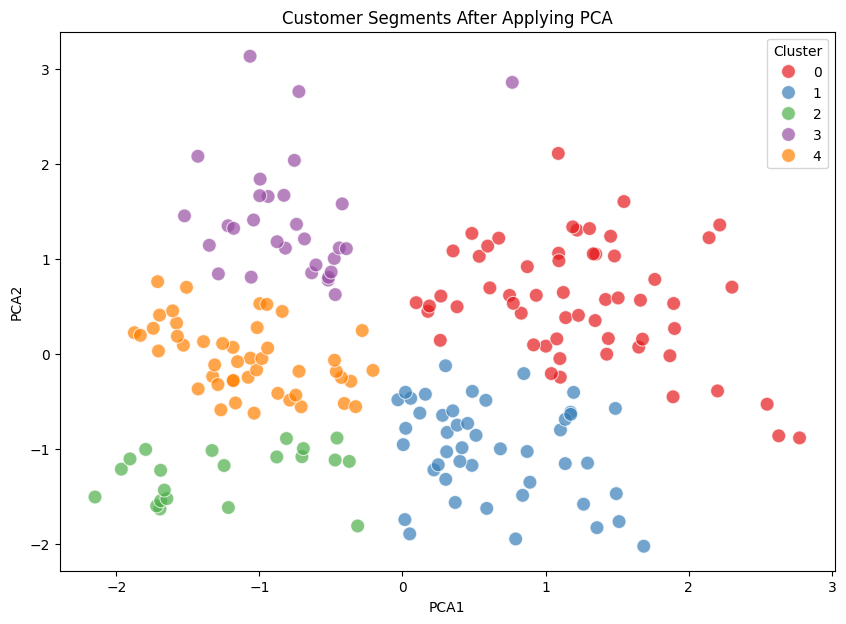

In [38]:
# Visualize clusters in the 2D PCA space
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segments After Applying PCA')
plt.show()


## Cluster Evaluation for Marketing Strategies

In [39]:
# Analyze each cluster
for i in range(5):  # Assuming K=5
    print(f"Cluster {i}:")
    print(df[df['Cluster'] == i][['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']].describe())


Cluster 0:
             Age     Gender  Annual Income (k$)  Spending Score (1-100)
count  57.000000  57.000000           57.000000               57.000000
mean   49.157895   0.789474           70.210526               28.719298
std    13.077775   0.411306           23.714625               18.531589
min    19.000000   0.000000           19.000000                1.000000
25%    41.000000   1.000000           54.000000               13.000000
50%    48.000000   1.000000           71.000000               27.000000
75%    59.000000   1.000000           87.000000               46.000000
max    70.000000   1.000000          126.000000               60.000000
Cluster 1:
             Age     Gender  Annual Income (k$)  Spending Score (1-100)
count  46.000000  46.000000           46.000000               46.000000
mean   48.326087   0.065217           46.652174               37.282609
std    10.284950   0.249637           17.233324               16.390598
min    20.000000   0.000000           16.0